In [17]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import sys

# Add src to path for imports
sys.path.append('../../src')

# Configure visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Libraries imported successfully!")


Libraries imported successfully!


In [18]:
# Load the dataset
data_path = Path('../../data/raw/Telco-Customer-Churn.csv')
df = pd.read_csv(data_path)

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Display first few rows
print("\nFirst 5 rows:")
df.head()


Dataset loaded successfully!
Shape: (7043, 21)
Memory usage: 7.79 MB

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
# Basic dataset information
print("Dataset Information:")
print("=" * 50)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"Number of features: {df.shape[1] - 1}")
print("Target column: Churn")

print("\nColumn Names:")
print(df.columns.tolist())

print("\nData Types:")
print(df.dtypes)

print("\nDataset Info:")
df.info()


Dataset Information:
Number of rows: 7,043
Number of columns: 21
Number of features: 20
Target column: Churn

Column Names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data Types:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCh

In [20]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 30)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Check for empty strings (potential data quality issue)
print("\nEmpty strings check:")
for col in df.select_dtypes(include=['object']).columns:
    empty_strings = (df[col] == '').sum()
    if empty_strings > 0:
        print(f"{col}: {empty_strings} empty strings")

# Special case: TotalCharges column (should be numeric but might contain empty strings)
print(f"\nTotalCharges data type: {df['TotalCharges'].dtype}")
print(f"TotalCharges unique values sample: {df['TotalCharges'].unique()[:10]}")

# Check if TotalCharges contains empty strings
totalcharges_empty = (df['TotalCharges'] == ' ').sum()
print(f"TotalCharges empty strings: {totalcharges_empty}")

if totalcharges_empty > 0:
    print("Sample rows with empty TotalCharges:")
    print(df[df['TotalCharges'] == ' '][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())


Missing Values Analysis:
No missing values found!

Duplicate rows: 0

Empty strings check:

TotalCharges data type: object
TotalCharges unique values sample: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
TotalCharges empty strings: 11
Sample rows with empty TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


Target Variable Distribution:
Churn distribution:
No: 5,174 (73.46%)
Yes: 1,869 (26.54%)

Overall churn rate: 0.265 (26.5%)


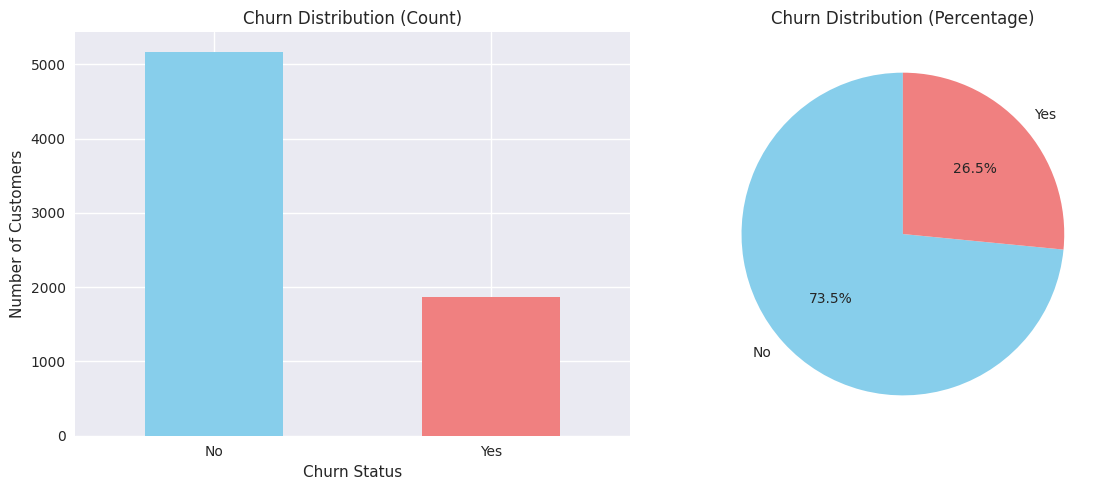


Class Imbalance Analysis:
Majority class (No churn): 5,174 samples
Minority class (Churn): 1,869 samples
Imbalance ratio: 2.77:1


In [21]:
# Target variable distribution
print("Target Variable Distribution:")
print("=" * 30)
churn_counts = df['Churn'].value_counts()
churn_percentages = df['Churn'].value_counts(normalize=True) * 100

print("Churn distribution:")
for label, count in churn_counts.items():
    percentage = churn_percentages[label]
    print(f"{label}: {count:,} ({percentage:.2f}%)")

# Calculate churn rate
churn_rate = (df['Churn'] == 'Yes').mean()
print(f"\nOverall churn rate: {churn_rate:.3f} ({churn_rate*100:.1f}%)")

# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
churn_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral'])
axes[0].set_title('Churn Distribution (Count)')
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Number of Customers')
axes[0].tick_params(axis='x', rotation=0)

# Pie chart
colors = ['skyblue', 'lightcoral']
axes[1].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
axes[1].set_title('Churn Distribution (Percentage)')

plt.tight_layout()
plt.show()

# Class imbalance assessment
print("\nClass Imbalance Analysis:")
print(f"Majority class (No churn): {churn_counts['No']:,} samples")
print(f"Minority class (Churn): {churn_counts['Yes']:,} samples")
print(f"Imbalance ratio: {churn_counts['No'] / churn_counts['Yes']:.2f}:1")


Categorical Variables:
Number of categorical features: 16
Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges']

Unique Values in Categorical Columns:
gender: 2 unique values - ['Female' 'Male']
Partner: 2 unique values - ['Yes' 'No']
Dependents: 2 unique values - ['No' 'Yes']
PhoneService: 2 unique values - ['No' 'Yes']
MultipleLines: 3 unique values - ['No phone service' 'No' 'Yes']
InternetService: 3 unique values - ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3 unique values - ['No' 'Yes' 'No internet service']
OnlineBackup: 3 unique values - ['Yes' 'No' 'No internet service']
DeviceProtection: 3 unique values - ['No' 'Yes' 'No internet service']
TechSupport: 3 unique values - ['No' 'Yes' 'No internet service']
StreamingTV: 3 unique values - ['No' 'Yes' 'No interne

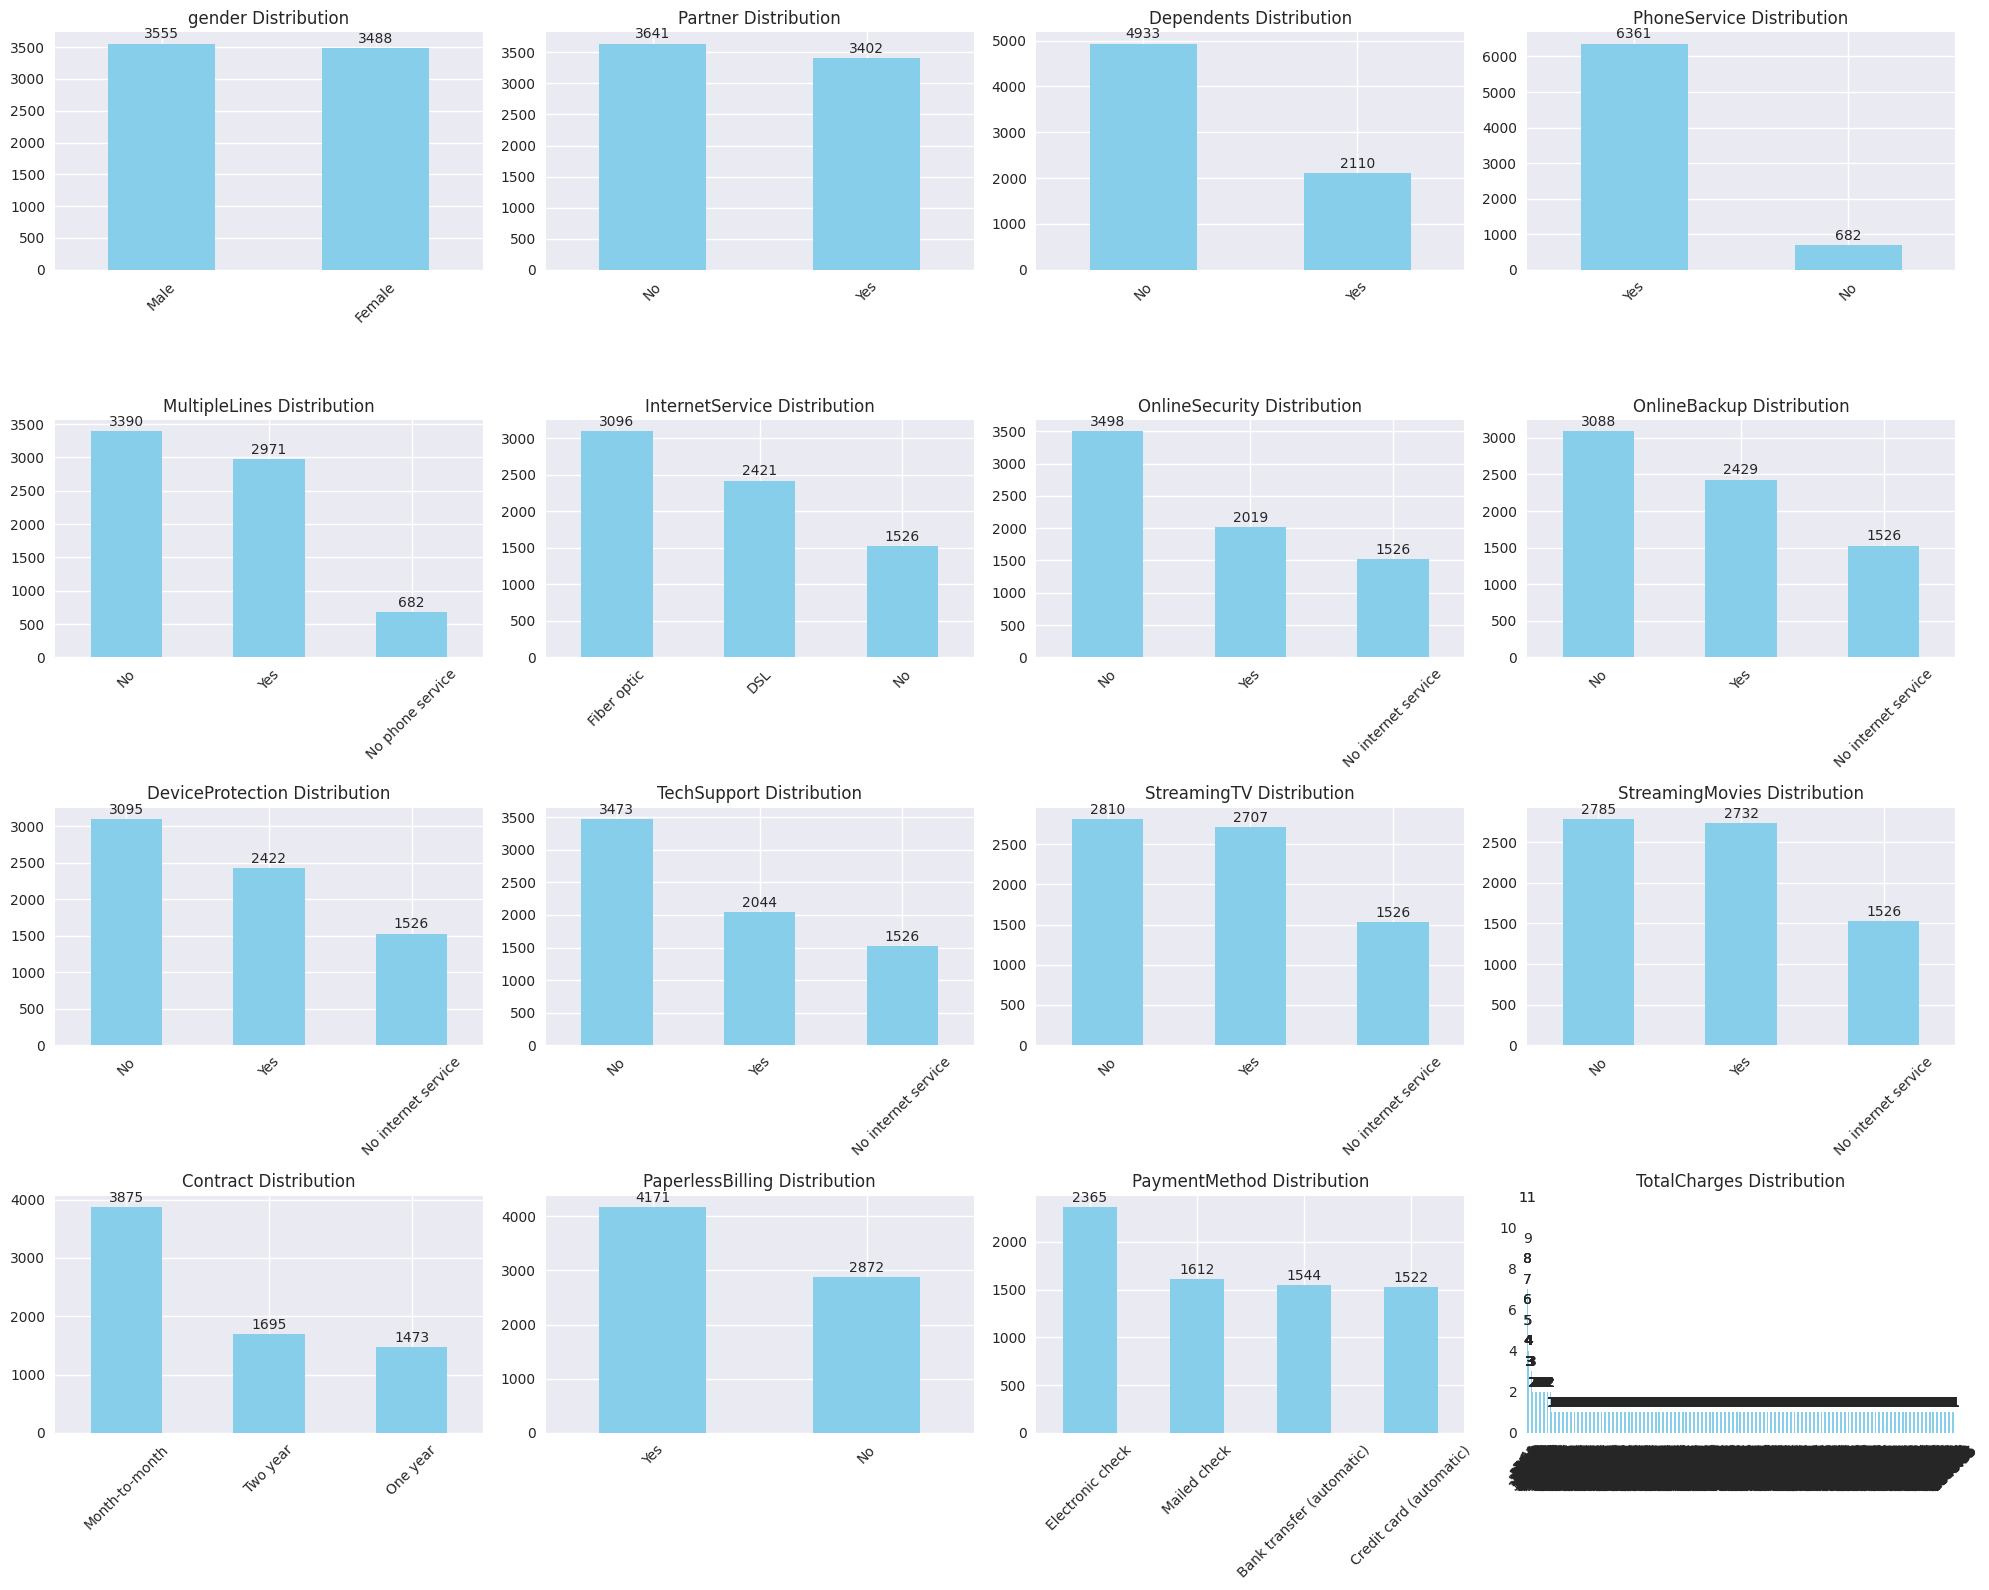


Senior Citizen Analysis:
SeniorCitizen distribution:
0: 5,901 (83.79%)
1: 1,142 (16.21%)


In [22]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('Churn')  # Remove target variable
categorical_cols.remove('customerID')  # Remove ID column

print("Categorical Variables:")
print("=" * 30)
print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Categorical columns: {categorical_cols}")

# Analyze unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in categorical_cols:
    unique_values = df[col].unique()
    print(f"{col}: {len(unique_values)} unique values - {unique_values}")

# Create visualization for categorical variables
fig, axes = plt.subplots(4, 4, figsize=(20, 16))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        value_counts = df[col].value_counts()
        ax = axes[i]
        value_counts.plot(kind='bar', ax=ax, color='skyblue')
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels on bars
        for j, v in enumerate(value_counts.values):
            ax.text(j, v + value_counts.max() * 0.01, str(v), ha='center', va='bottom')

# Remove empty subplots
for i in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Analyze SeniorCitizen (special case - numeric but binary)
print("\nSenior Citizen Analysis:")
print("=" * 25)
senior_counts = df['SeniorCitizen'].value_counts()
print("SeniorCitizen distribution:")
for label, count in senior_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{label}: {count:,} ({percentage:.2f}%)")

# Convert SeniorCitizen to more readable format for analysis
df['SeniorCitizen_Label'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


Numerical Variables Analysis:
Numerical columns: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

Descriptive Statistics:
            tenure  MonthlyCharges  TotalCharges  SeniorCitizen
count  7043.000000     7043.000000   7032.000000    7043.000000
mean     32.371149       64.761692   2283.300441       0.162147
std      24.559481       30.090047   2266.771362       0.368612
min       0.000000       18.250000     18.800000       0.000000
25%       9.000000       35.500000    401.450000       0.000000
50%      29.000000       70.350000   1397.475000       0.000000
75%      55.000000       89.850000   3794.737500       0.000000
max      72.000000      118.750000   8684.800000       1.000000

Outlier Detection (IQR Method):
tenure: 0 outliers (0.00%)
MonthlyCharges: 0 outliers (0.00%)
TotalCharges: 0 outliers (0.00%)


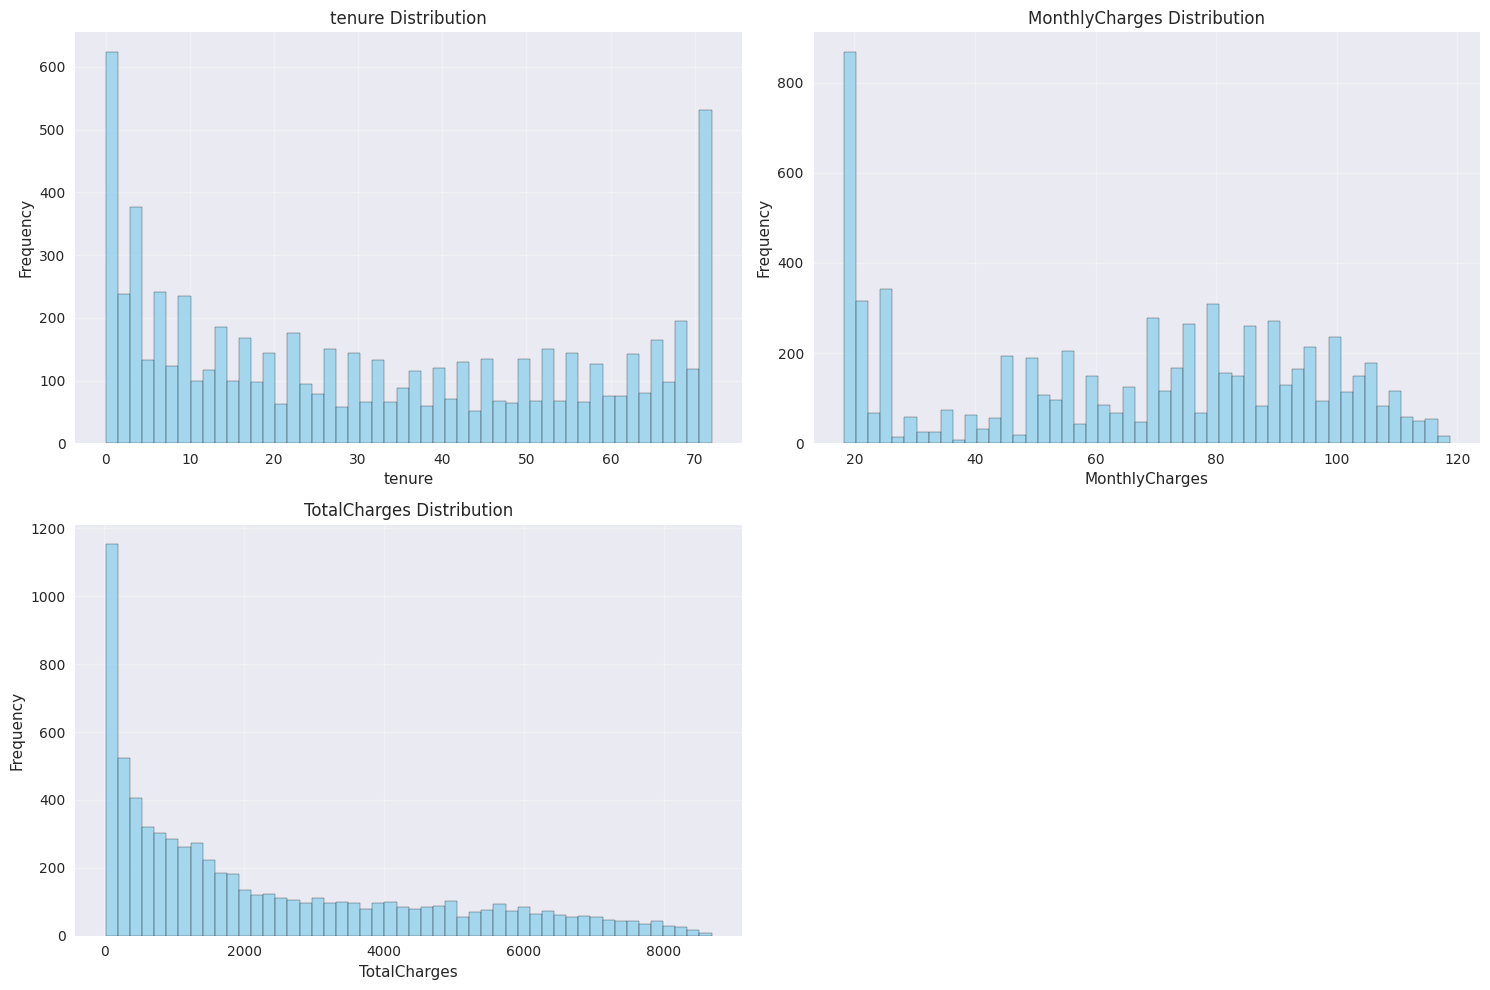

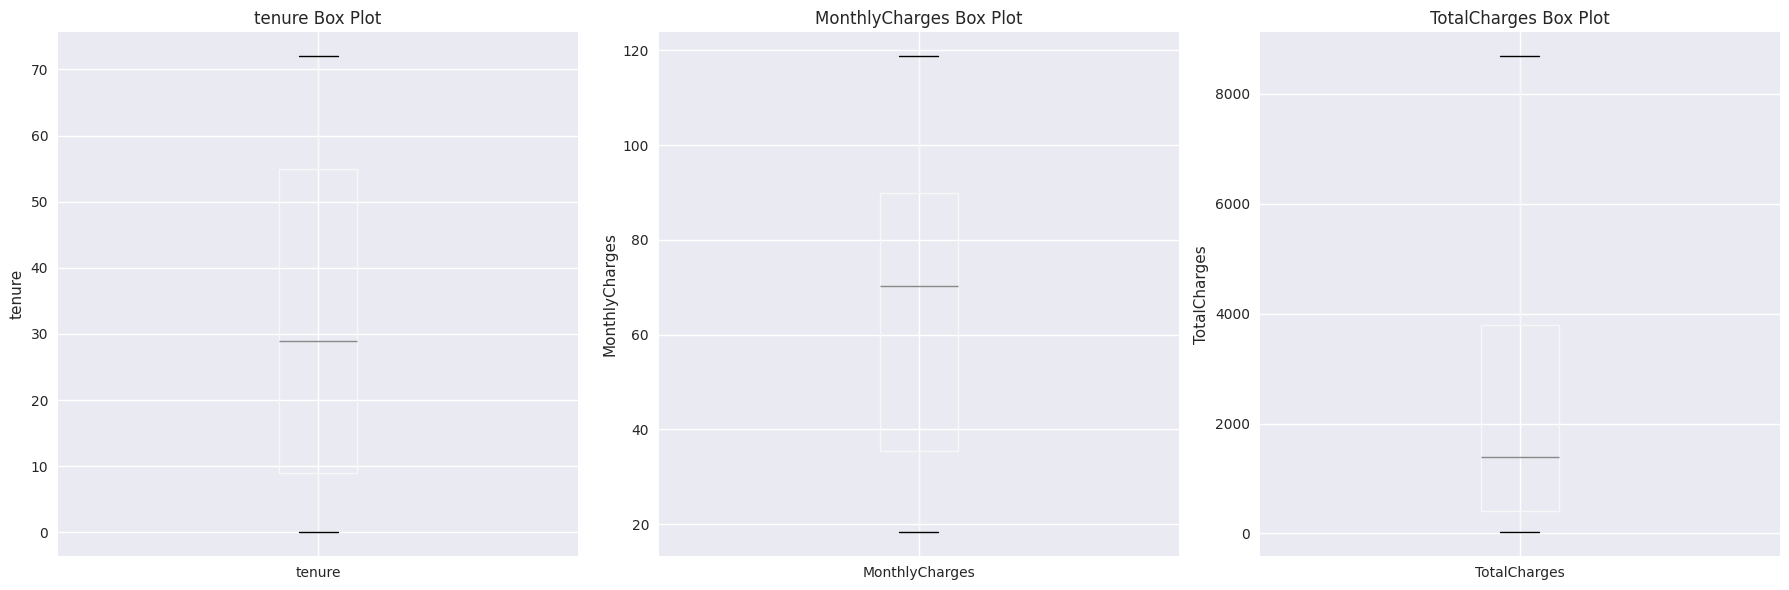


Correlation Matrix:
                  tenure  MonthlyCharges  TotalCharges  SeniorCitizen
tenure          1.000000        0.247900      0.825880       0.016567
MonthlyCharges  0.247900        1.000000      0.651065       0.220173
TotalCharges    0.825880        0.651065      1.000000       0.102411
SeniorCitizen   0.016567        0.220173      0.102411       1.000000


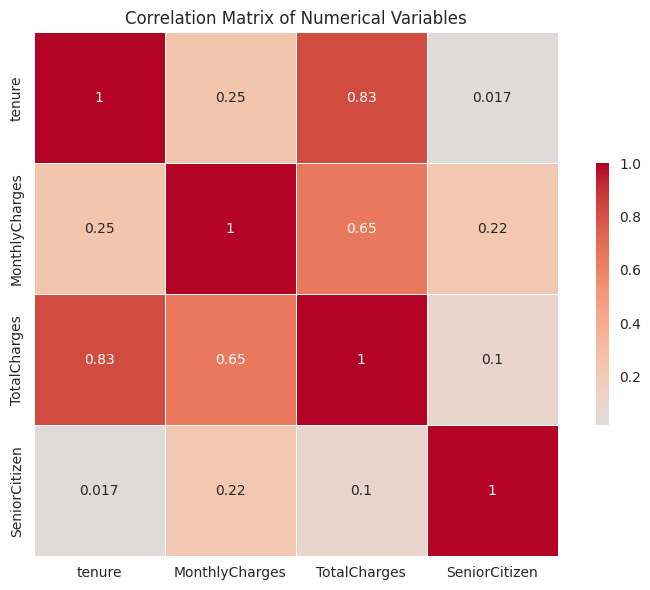

In [23]:
# First, let's fix the TotalCharges column (convert to numeric)
# Handle empty strings in TotalCharges
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Identify numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen']

print("Numerical Variables Analysis:")
print("=" * 35)
print(f"Numerical columns: {numerical_cols}")

# Descriptive statistics
print("\nDescriptive Statistics:")
print(df[numerical_cols].describe())

# Check for outliers using IQR method
print("\nOutlier Detection (IQR Method):")
print("=" * 35)
for col in numerical_cols:
    if col != 'SeniorCitizen':  # Skip binary variable
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")
        if len(outliers) > 0:
            print(f"  Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            print(f"  Outlier values: {outliers.min():.2f} to {outliers.max():.2f}")

# Visualize numerical distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if col != 'SeniorCitizen':  # Skip binary variable for distribution plot
        ax = axes[i]
        df[col].hist(bins=50, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'{col} Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        ax.grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[3])

plt.tight_layout()
plt.show()

# Box plots for numerical variables
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(f'{col} Box Plot')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

# Correlation analysis
print("\nCorrelation Matrix:")
print("=" * 20)
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.5})
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()


Churn Rate by Categorical Features:

gender:
  Female: 0.269 (26.9%) - 3488 customers
  Male: 0.262 (26.2%) - 3555 customers

SeniorCitizen_Label:
  Yes: 0.417 (41.7%) - 1142 customers
  No: 0.236 (23.6%) - 5901 customers

Partner:
  No: 0.330 (33.0%) - 3641 customers
  Yes: 0.197 (19.7%) - 3402 customers

Dependents:
  No: 0.313 (31.3%) - 4933 customers
  Yes: 0.155 (15.5%) - 2110 customers

PhoneService:
  Yes: 0.267 (26.7%) - 6361 customers
  No: 0.249 (24.9%) - 682 customers

MultipleLines:
  Yes: 0.286 (28.6%) - 2971 customers
  No: 0.250 (25.0%) - 3390 customers
  No phone service: 0.249 (24.9%) - 682 customers

InternetService:
  Fiber optic: 0.419 (41.9%) - 3096 customers
  DSL: 0.190 (19.0%) - 2421 customers
  No: 0.074 (7.4%) - 1526 customers

OnlineSecurity:
  No: 0.418 (41.8%) - 3498 customers
  Yes: 0.146 (14.6%) - 2019 customers
  No internet service: 0.074 (7.4%) - 1526 customers

OnlineBackup:
  No: 0.399 (39.9%) - 3088 customers
  Yes: 0.215 (21.5%) - 2429 customers
  

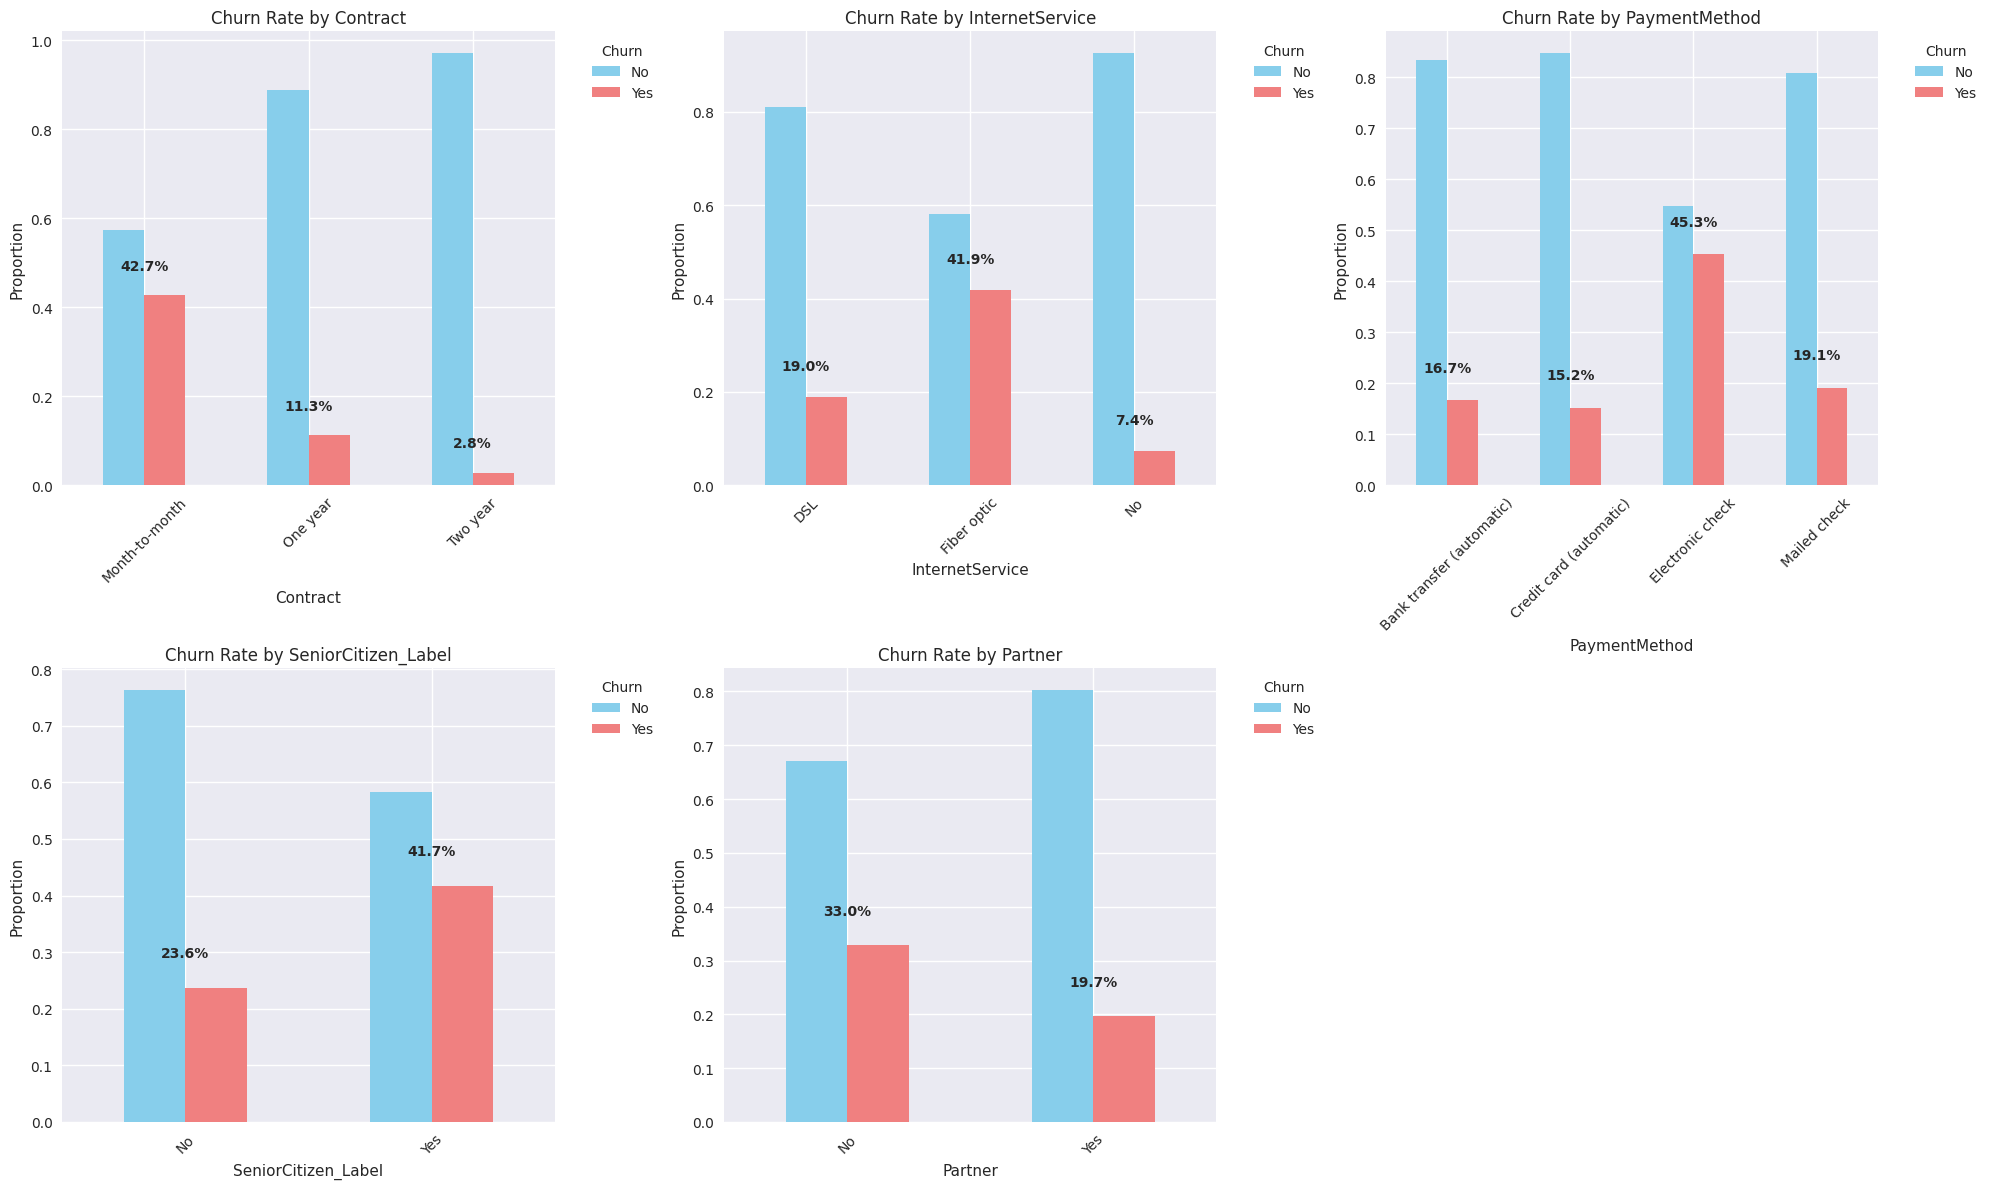


Numerical Features Analysis by Churn:
Statistical Summary by Churn Status:
          tenure                   MonthlyCharges                     \
            mean median        std           mean  median        std   
Churn                                                                  
No     37.569965   38.0  24.113777      61.265124  64.425  31.092648   
Yes    17.979133   10.0  19.531123      74.441332  79.650  24.666053   

      TotalCharges                        
              mean   median          std  
Churn                                     
No     2555.344141  1683.60  2329.456984  
Yes    1531.796094   703.55  1890.822994  


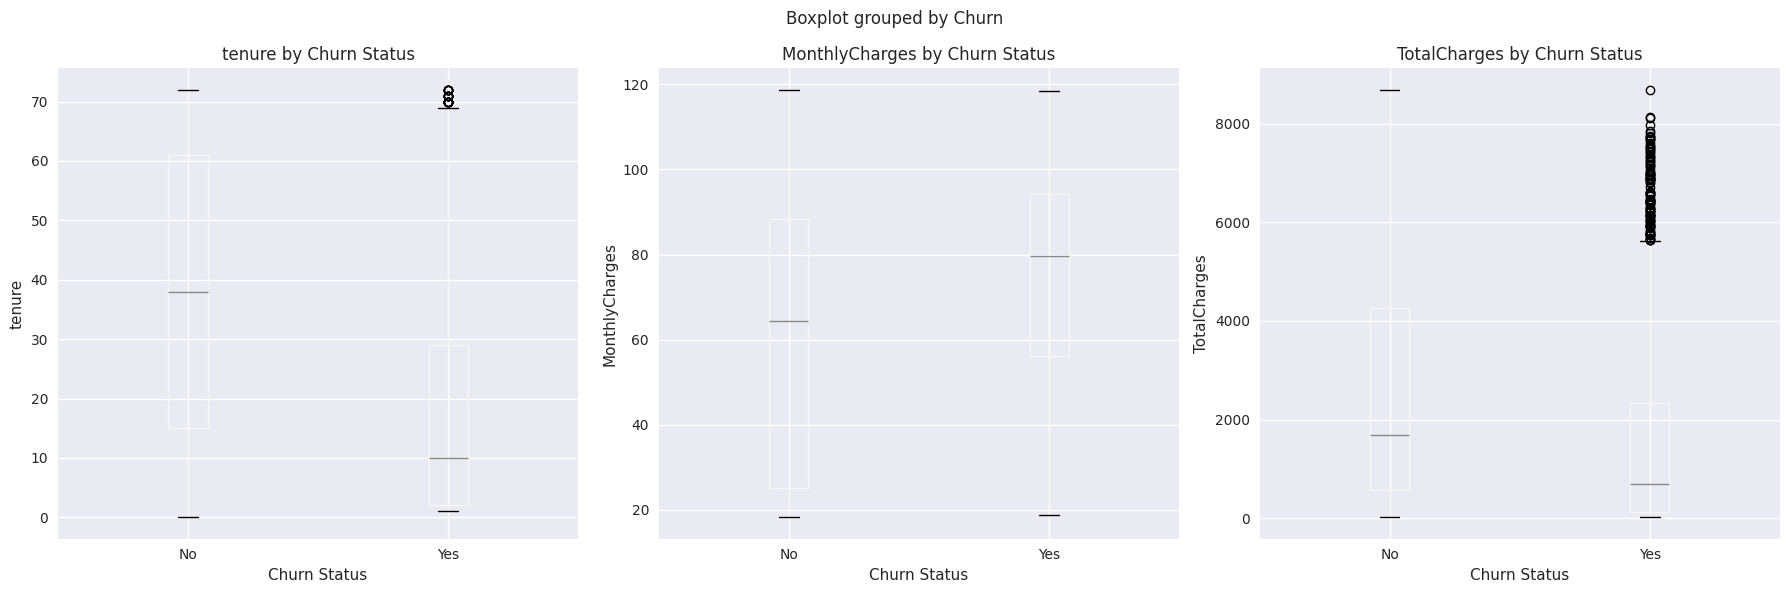

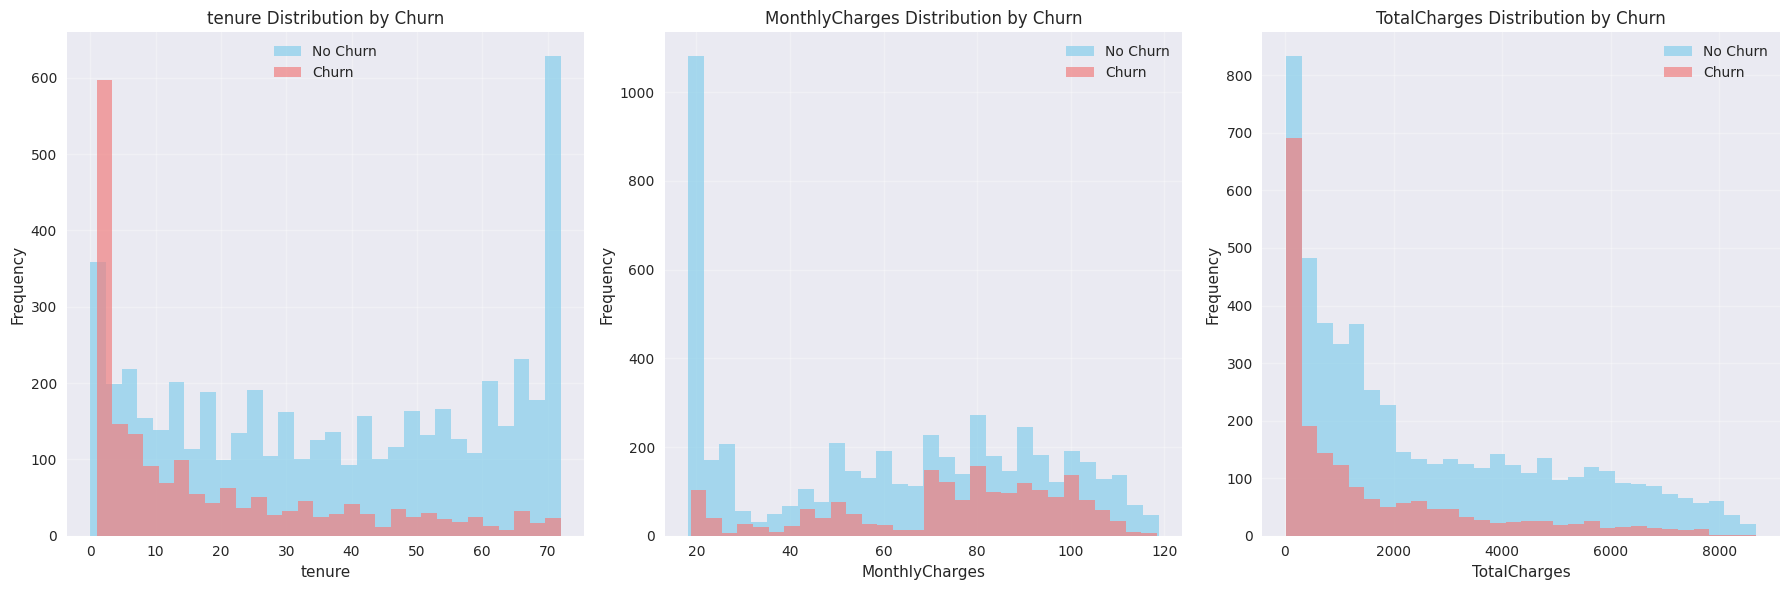

In [24]:
# Churn rate by categorical features
print("Churn Rate by Categorical Features:")
print("=" * 40)

categorical_features = ['gender', 'SeniorCitizen_Label', 'Partner', 'Dependents', 'PhoneService',
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

churn_rates = {}
for feature in categorical_features:
    churn_by_feature = df.groupby(feature)['Churn'].apply(lambda x: (x == 'Yes').mean()).sort_values(ascending=False)
    churn_rates[feature] = churn_by_feature
    print(f"\n{feature}:")
    for category, rate in churn_by_feature.items():
        count = len(df[df[feature] == category])
        print(f"  {category}: {rate:.3f} ({rate*100:.1f}%) - {count} customers")

# Visualize churn rates for key categorical features
key_features = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen_Label', 'Partner']
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.ravel()

for i, feature in enumerate(key_features):
    ax = axes[i]
    
    # Create crosstab
    crosstab = pd.crosstab(df[feature], df['Churn'], normalize='index')
    
    # Plot stacked bar chart
    crosstab.plot(kind='bar', ax=ax, color=['skyblue', 'lightcoral'], 
                title=f'Churn Rate by {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Proportion')
    ax.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    
    # Add percentage labels
    for j, (category, rates) in enumerate(crosstab.iterrows()):
        churn_rate = rates['Yes']
        ax.text(j, churn_rate + 0.05, f'{churn_rate:.1%}', ha='center', va='bottom', fontweight='bold')

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Analyze numerical features by churn
print("\nNumerical Features Analysis by Churn:")
print("=" * 40)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
churn_comparison = df.groupby('Churn')[numerical_features].agg(['mean', 'median', 'std'])

print("Statistical Summary by Churn Status:")
print(churn_comparison)

# Visualize numerical features by churn
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Box plot
    df.boxplot(column=feature, by='Churn', ax=ax)
    ax.set_title(f'{feature} by Churn Status')
    ax.set_xlabel('Churn Status')
    ax.set_ylabel(feature)
    
    # Remove the automatic title
    plt.setp(ax, title=f'{feature} by Churn Status')

plt.tight_layout()
plt.show()

# Additional analysis: Distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, feature in enumerate(numerical_features):
    ax = axes[i]
    
    # Distribution by churn
    df[df['Churn'] == 'No'][feature].hist(bins=30, alpha=0.7, label='No Churn', 
                                        color='skyblue', ax=ax)
    df[df['Churn'] == 'Yes'][feature].hist(bins=30, alpha=0.7, label='Churn', 
                                        color='lightcoral', ax=ax)
    
    ax.set_title(f'{feature} Distribution by Churn')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Statistical Significance Tests:

Chi-square Test Results (sorted by Chi2 statistic):
                Feature    Chi2_Stat        P_Value  Significant
13             Contract  1184.596572  5.863038e-258         True
7        OnlineSecurity   849.998968  2.661150e-185         True
10          TechSupport   828.197068  1.443084e-180         True
6       InternetService   732.309590  9.571788e-160         True
15        PaymentMethod   648.142327  3.682355e-140         True
8          OnlineBackup   601.812790  2.079759e-131         True
9      DeviceProtection   558.419369  5.505219e-122         True
12      StreamingMovies   375.661479   2.667757e-82         True
11          StreamingTV   374.203943   5.528994e-82         True
14     PaperlessBilling   258.277649   4.073355e-58         True
3            Dependents   189.129249   4.924922e-43         True
1   SeniorCitizen_Label   159.426300   1.510067e-36         True
2               Partner   158.733382   2.139911e-36         True
5    

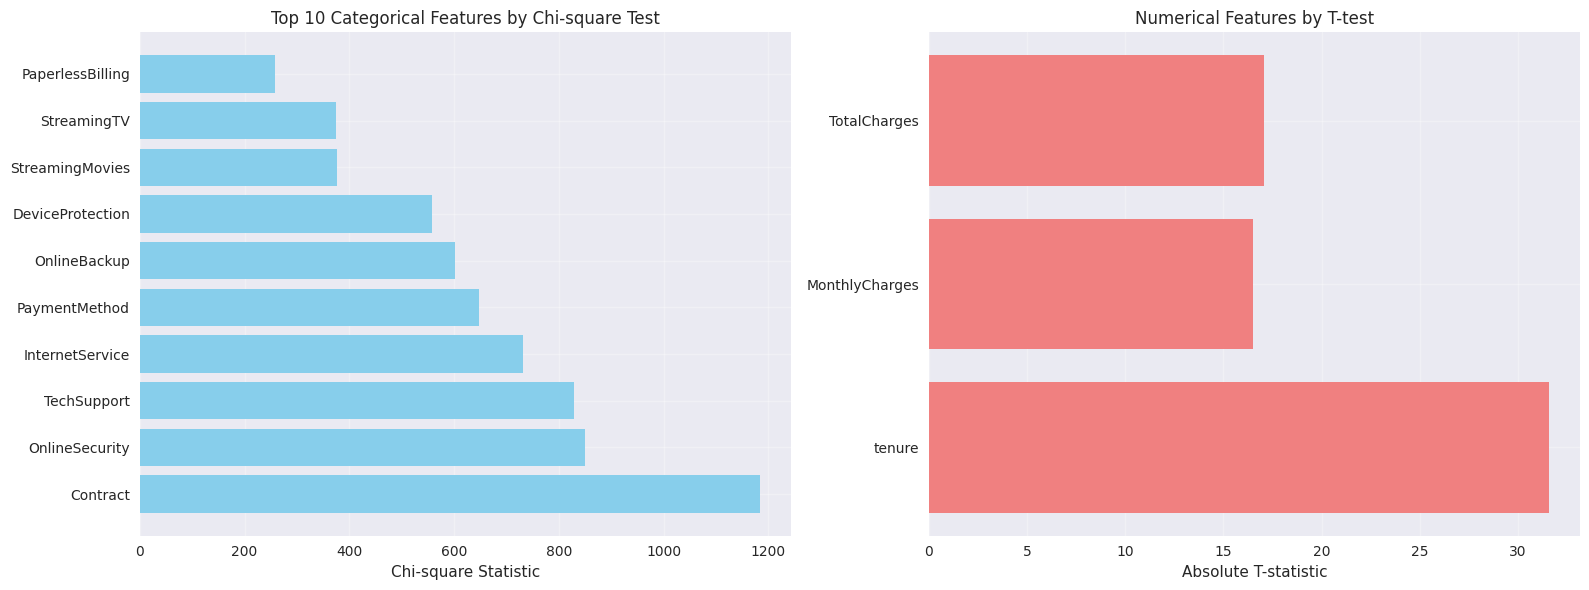


Effect Size Analysis:
Cramér's V for Categorical Features:
gender: 0.000
SeniorCitizen_Label: 0.150
Partner: 0.150
Dependents: 0.163
PhoneService: 0.000
MultipleLines: 0.036
InternetService: 0.322
OnlineSecurity: 0.347
OnlineBackup: 0.292
DeviceProtection: 0.281
TechSupport: 0.343
StreamingTV: 0.230
StreamingMovies: 0.230
Contract: 0.410
PaperlessBilling: 0.191
PaymentMethod: 0.303

Cohen's d for Numerical Features:
tenure: -0.852
MonthlyCharges: 0.446
TotalCharges: -0.461


In [25]:
# Chi-square test for categorical features
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder

print("Statistical Significance Tests:")
print("=" * 35)

# Chi-square test for categorical features
categorical_features_for_test = ['gender', 'SeniorCitizen_Label', 'Partner', 'Dependents', 
                                'PhoneService', 'MultipleLines', 'InternetService', 
                                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                                'TechSupport', 'StreamingTV', 'StreamingMovies', 
                                'Contract', 'PaperlessBilling', 'PaymentMethod']

chi2_results = []
for feature in categorical_features_for_test:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_results.append({
        'Feature': feature,
        'Chi2_Stat': chi2_stat,
        'P_Value': p_value,
        'Significant': p_value < 0.05
    })

chi2_df = pd.DataFrame(chi2_results).sort_values('Chi2_Stat', ascending=False)
print("\nChi-square Test Results (sorted by Chi2 statistic):")
print(chi2_df)

# T-test for numerical features

print("\n\nT-test Results for Numerical Features:")
print("=" * 40)

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
ttest_results = []

for feature in numerical_features:
    churn_group = df[df['Churn'] == 'Yes'][feature].dropna()
    no_churn_group = df[df['Churn'] == 'No'][feature].dropna()
    
    t_stat, p_value = ttest_ind(churn_group, no_churn_group)
    ttest_results.append({
        'Feature': feature,
        'T_Stat': t_stat,
        'P_Value': p_value,
        'Significant': p_value < 0.05
    })

ttest_df = pd.DataFrame(ttest_results)
print(ttest_df)

# Visualization: Feature importance ranking
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chi-square results
ax1 = axes[0]
chi2_df_top = chi2_df.head(10)
ax1.barh(range(len(chi2_df_top)), chi2_df_top['Chi2_Stat'], color='skyblue')
ax1.set_yticks(range(len(chi2_df_top)))
ax1.set_yticklabels(chi2_df_top['Feature'])
ax1.set_xlabel('Chi-square Statistic')
ax1.set_title('Top 10 Categorical Features by Chi-square Test')
ax1.grid(True, alpha=0.3)

# T-test results
ax2 = axes[1]
ttest_df['Abs_T_Stat'] = abs(ttest_df['T_Stat'])
ax2.barh(range(len(ttest_df)), ttest_df['Abs_T_Stat'], color='lightcoral')
ax2.set_yticks(range(len(ttest_df)))
ax2.set_yticklabels(ttest_df['Feature'])
ax2.set_xlabel('Absolute T-statistic')
ax2.set_title('Numerical Features by T-test')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate effect size (Cramér's V for categorical, Cohen's d for numerical)
print("\nEffect Size Analysis:")
print("=" * 25)

# Cramér's V for categorical features
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Cramér's V for Categorical Features:")
for feature in categorical_features_for_test:
    contingency_table = pd.crosstab(df[feature], df['Churn'])
    cramers_v_value = cramers_v(contingency_table)
    print(f"{feature}: {cramers_v_value:.3f}")

# Cohen's d for numerical features
def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    pooled_std = np.sqrt(((n1-1)*np.var(group1, ddof=1) + (n2-1)*np.var(group2, ddof=1)) / (n1+n2-2))
    return (np.mean(group1) - np.mean(group2)) / pooled_std

print("\nCohen's d for Numerical Features:")
for feature in numerical_features:
    churn_group = df[df['Churn'] == 'Yes'][feature].dropna()
    no_churn_group = df[df['Churn'] == 'No'][feature].dropna()
    cohens_d_value = cohens_d(churn_group, no_churn_group)
    print(f"{feature}: {cohens_d_value:.3f}")


In [28]:
# Summary of key insights
print("📊 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("=" * 50)

print("\n🎯 CHURN OVERVIEW:")
print(f"• Overall churn rate: {churn_rate:.1%}")
print(f"• Class imbalance: {churn_counts['No'] / churn_counts['Yes']:.1f}:1 (No:Yes)")
print(f"• Dataset size: {len(df):,} customers")

print("\n🏆 TOP PREDICTIVE FEATURES (based on statistical tests):")
print("Categorical features (by Chi-square):")
for i, (_, row) in enumerate(chi2_df.head(5).iterrows(), 1):
    print(f"  {i}. {row['Feature']}: χ² = {row['Chi2_Stat']:.1f}, p = {row['P_Value']:.2e}")

print("\nNumerical features (by T-test):")
for _, row in ttest_df.iterrows():
    print(f"  • {row['Feature']}: t = {row['T_Stat']:.2f}, p = {row['P_Value']:.2e}")

print("\n📈 CHURN PATTERNS:")
print("High churn risk factors:")
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean())
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean())
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean())

print(f"• Month-to-month contracts: {contract_churn['Month-to-month']:.1%} churn rate")
print(f"• Electronic check payments: {payment_churn['Electronic check']:.1%} churn rate")
print(f"• Fiber optic internet: {internet_churn['Fiber optic']:.1%} churn rate")
print(f"• Senior citizens: {df.groupby('SeniorCitizen_Label')['Churn'].apply(lambda x: (x == 'Yes').mean())['Yes']:.1%} churn rate")

print("\n💰 FINANCIAL PATTERNS:")
tenure_churn = df[df['Churn'] == 'Yes']['tenure'].mean()
tenure_no_churn = df[df['Churn'] == 'No']['tenure'].mean()
print(f"• Average tenure (churned): {tenure_churn:.1f} months")
print(f"• Average tenure (retained): {tenure_no_churn:.1f} months")

monthly_churn = df[df['Churn'] == 'Yes']['MonthlyCharges'].mean()
monthly_no_churn = df[df['Churn'] == 'No']['MonthlyCharges'].mean()
print(f"• Average monthly charges (churned): ${monthly_churn:.2f}")
print(f"• Average monthly charges (retained): ${monthly_no_churn:.2f}")

print("\n🛠️ DATA QUALITY NOTES:")
print(f"• TotalCharges missing values: {df['TotalCharges'].isna().sum()}")
print("• No duplicate customers found")
print("• All features have reasonable value ranges")

print("\n🔍 FEATURE ENGINEERING OPPORTUNITIES:")
print("1. Tenure categories (New: 0-12, Medium: 13-24, Long: 25-48, Very Long: 49+ months)")
print("2. Monthly charges categories (Low: <$35, Medium: $35-$65, High: >$65)")
print("3. Total services count (sum of add-on services)")
print("4. Average monthly spend (TotalCharges / tenure)")
print("5. Payment risk indicator (based on payment method)")
print("6. Service complexity score (based on number of services)")

print("\n📊 MODELING RECOMMENDATIONS:")
print("1. Handle class imbalance (2.8:1 ratio)")
print("2. Focus on high-impact features: Contract, PaymentMethod, InternetService, tenure")
print("3. Consider ensemble methods for better performance")
print("4. Implement proper cross-validation strategy")
print("5. Monitor for data drift in production")

print("\n🎯 BUSINESS INSIGHTS:")
print("1. Month-to-month customers are high-risk - consider incentivizing longer contracts")
print("2. Electronic check users churn more - promote automated payment methods")
print("3. New customers (low tenure) need special attention and onboarding")
print("4. Fiber optic customers paradoxically churn more - investigate service quality")
print("5. Senior citizens may need different retention strategies")


📊 KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

🎯 CHURN OVERVIEW:
• Overall churn rate: 19.7%
• Class imbalance: 2.8:1 (No:Yes)
• Dataset size: 7,043 customers

🏆 TOP PREDICTIVE FEATURES (based on statistical tests):
Categorical features (by Chi-square):
  1. Contract: χ² = 1184.6, p = 5.86e-258
  2. OnlineSecurity: χ² = 850.0, p = 2.66e-185
  3. TechSupport: χ² = 828.2, p = 1.44e-180
  4. InternetService: χ² = 732.3, p = 9.57e-160
  5. PaymentMethod: χ² = 648.1, p = 3.68e-140

Numerical features (by T-test):
  • tenure: t = -31.58, p = 8.00e-205
  • MonthlyCharges: t = 16.54, p = 2.71e-60
  • TotalCharges: t = -17.07, p = 4.88e-64

📈 CHURN PATTERNS:
High churn risk factors:
• Month-to-month contracts: 42.7% churn rate
• Electronic check payments: 45.3% churn rate
• Fiber optic internet: 41.9% churn rate
• Senior citizens: 41.7% churn rate

💰 FINANCIAL PATTERNS:
• Average tenure (churned): 18.0 months
• Average tenure (retained): 37.6 months
• Average monthly charges (churned): $74.44
•

In [33]:
# Save the cleaned dataset for future use
print("💾 SAVING CLEANED DATASET")
print("=" * 30)

# Create a clean version of the dataset
df_clean = df.copy()

# Remove the temporary column we created
df_clean = df_clean.drop('SeniorCitizen_Label', axis=1)

# Save to interim folder
interim_path = Path('../../data/interim/Telco-Customer-Churn-Cleaned.csv')
interim_path.parent.mkdir(exist_ok=True)
df_clean.to_csv(interim_path, index=False)

print(f"✅ Cleaned dataset saved to: {interim_path}")
print(f"Shape: {df_clean.shape}")
print(f"Missing values in TotalCharges: {df_clean['TotalCharges'].isna().sum()}")
print(f"Features: {df_clean.shape[1] - 1}")
print("Target: Churn")

# Display final dataset info
print("\n📋 FINAL DATASET SUMMARY:")
print(f"Customers: {len(df_clean):,}")
print(f"Features: {df_clean.shape[1] - 1}")
print(f"Churn Rate: {(df_clean['Churn'] == 'Yes').mean():.1%}")
print(f"Data Quality: {df_clean.isnull().sum().sum()} missing values")
print("\n🎉 Exploratory Data Analysis Complete!")
print("Ready for feature engineering and model development.")


💾 SAVING CLEANED DATASET
✅ Cleaned dataset saved to: ../../data/interim/Telco-Customer-Churn-Cleaned.csv
Shape: (7043, 21)
Missing values in TotalCharges: 11
Features: 20
Target: Churn

📋 FINAL DATASET SUMMARY:
Customers: 7,043
Features: 20
Churn Rate: 26.5%
Data Quality: 11 missing values

🎉 Exploratory Data Analysis Complete!
Ready for feature engineering and model development.
